# Дополнительное задание к работе 5.5

Данный пункт выполняется вместо пункта I.6 дополнительного описания работы 5.5
Устнановите  перед сцинтиллятором образец $^{22}Na$ и проведите измерение с экспозицией $\sim 10$ минут. Сохраните результат измерения в файл. Повторите измерение для остальных образцов. Сохраните полученные результаты на флешку и дома, прочтя приведенную справку, определите положение пиков полного поглощения для измеренных образцов. Для этого:
    1. Подумайте какими функциями нужно фитировать форму пика и фоновую подложку. Какие параметры выбранных вами функций отвечают за положение и ширину пика?
        
    2. Реализуйте функцию, аналогично примеру.
    
    3. Определите диапазон экспериментальных точек, на котором вы будете проводить фитирорвание. Изменяя этот диапазон можно добиться улучшения или ухудшения качества фита.
    
    4. Профитируйте данные с помощью функции `curve_fit`
    
    5. Полученные значения положения пика и его ширины используйте в пунтке II описания работы 5.5


# Справочные материалы к работам 5.5, 5.3, 5.1a


## Фитирование
Пусть есть набор экспериментальных точек $(x_i, y_i)$ (полученных, естественно, с некоторой погрешностью) и есть некоторая функция $F(x,\theta)$, которая предположительно описывает нашу экспериментальную зависимость при некотором $\hat{\theta}$. Процедура поиска значения параметра или набора параметров $\theta^*$, при которых функция $(x,\theta)$ наилучшим образом описывает экспериментальные точки, называется фитированием.

Фитирование важная процедура и многие математический библиотеки имеют функции для проведения этой операции.


## Определение положения пика

Фитирование может применяться для определения положения пика. В качестве примера можно рассмотреть график, иллюстрирующий открытие бозона Хиггса: 
![](./example_fit.jpg)
Красной линией на верхнем графике показан результат фитирования экпериментальных данных с помощью суммы двух функций: описывающей фоновую подложку и форму пика.
Проведя процедуру фитирования можно получить точное положения максимума пика и его ширину. Похожая задача предстоит нам и работах 5.5 и 4.2



## Пример

Пусть есть истиная функция $y = x^2 - x + 1$, и результат измерения этой зависимости (файл `example_fit.dat`). Предположим, что нам из каких-то теоретических предположений известно, что зависимость должна быть параболической, и мы пытаемся восстановить параметры этой параболы. Для этого мы воспользуемся функцией `curve_fit` из модуля `scipy.optimize`

In [1]:
# Импротируем необходимые функции
import numpy as np # работа с массивами и линейной алгеброй
import matplotlib.pyplot as plt # для отрисовки графиков
import pandas as pd # для чтения и работы с данными
from scipy.optimize import curve_fit # фитирующая процедура



In [2]:
# Так были сгенерированны данные
# from tabulate import tabulate
# n = 15
# x = np.linspace(0, 1, n)
# y_true = x**2 - x + 1
# error = y_true*0.1*np.random.sample(n)
# y = np.random.normal(y_true, error)
# with open('example_fit.txt', 'w') as fout:
#     text = tabulate(zip(x,y, error), headers = ('x', 'y', 'y_error'), tablefmt='plain')
#     fout.write(text)

In [7]:
data = pd.read_table('example_fit.txt', # имя или путь к файлу    
                    sep = '\s+' # Здесь указывается разделитель между значениями, используемыми в файле
                    )

In [5]:
# Создадим переменные с короткими именами
x = data['x']
y = data['y']
yerr = data['y_error']

In [15]:
x[0] # получить одно значение

0.0

In [16]:
x[5:10] # выбрать диапазон значений

5    0.357143
6    0.428571
7    0.500000
8    0.571429
9    0.642857
Name: x, dtype: float64

In [17]:
def parabolla(x, a, b, c):
    """
    Параметрическая парабола
    """
    return a*x**2 + b*x + c

In [18]:
result = curve_fit(f = parabolla, # функция, для которой ищутся параметры
                   xdata= x, ydata=y, # вводим экспериментальные точки
          )

Функция `curve_fit`  имеет большой список параметров. Например, кроме экспериментальных точек можно указать их ошибки, и тогда будет применен алгоритм фитирования, учитывающий величины ошибок, или начальную точку для поиска значения параметров. 

In [19]:
result # Кортеж из двух массивов: первый - это вектор значений параметров, 
       # второй - ковариционная матрица, которая может быть использована для оценки качества фита

(array([ 0.9501661 , -1.03201227,  1.04199594]),
 array([[ 0.02177803, -0.02177803,  0.00337041],
        [-0.02177803,  0.02341508, -0.00418894],
        [ 0.00337041, -0.00418894,  0.00108678]]))

In [20]:
popt, pcov = result # декомпозиция кортежа по отдельным переменным

In [21]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 16 # Управление стилем, в данном случаем - размером шрифта 

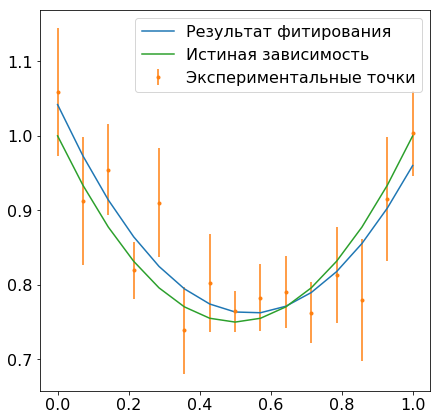

In [22]:
plt.figure(figsize= (7,7)) # Настраиваем размер холста
plt.plot(x, parabolla(x, *popt), label='Результат фитирования') # Строим график
plt.errorbar(x,y, yerr=yerr, fmt='.', label='Экспериментальные точки') # Строим график с "крестами"
plt.plot(x, parabolla(x, 1,-1,1), label="Истиная зависимость")
plt.legend(); # Активируем легенду